In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import time

from scipy.integrate import odeint, ode

from Derivatives import *

import warnings

### Reading data

In [2]:
dir   = "DATA/"
file1 = 'BHBH.csv'
file2 = 'BHBHm.csv'

BHBH  = pd.read_csv(dir+file1)
BHBHm = pd.read_csv(dir+file2)

In [3]:
BHBH.head()

,ID,name,BWorldtime,Mass_0,Radius_0,Zams_0,Phase_0,RemnantType_0,Mass_1,Radius_1,...,GWtime,EventsAll,Events,EventsPlus,Mzams_0,Mzams_1,Semimajor_ini,Eccentricity_ini,Z,alpha
0,360308,0_792857804219921,5.411991,18.34303,0.000078,21.22227,7,6,21.09631,0.000090,...,9.974991e+04,RB01:RE:ehSt:RB13:RE:erSt,RB:RE:S:RB:RE:S,RB:RE:ehSt:RB:RE:erSt,41.0592,34.5745,24.874630,0.2619,0.0004,0.5
1,360337,0_285120263308905,4.134819,50.99943,0.000217,92.24360,7,6,51.78028,0.000220,...,5.611226e+16,hhS:hrS,S:S,hhS:hrS,92.2436,53.6410,81917.701038,0.3955,0.0004,0.5
2,360367,0_303570516402716,4.311590,33.98611,0.000144,41.10912,7,6,30.83786,0.000131,...,7.105206e+05,RB01:RE:RB03:RE:ehSt:RB13:RE:erSt,RB:RE:RB:RE:S:RB:RE:S,RB:RE:RB:RE:ehSt:RB:RE:erSt,74.5563,46.8471,127.422203,0.2217,0.0004,0.5
3,360429,0_321152334354104,5.738531,42.61480,0.000181,50.85000,7,6,33.31328,0.000141,...,1.212675e+07,RB04:hhS:RE:RB14:hrS,RB:S:RE:RB:S,RB:hhS:RE:RB:hrS,50.8500,32.3486,316.947946,0.0107,0.0004,0.5
4,360471,0_850952161687565,4.503749,49.74939,0.000211,65.22210,7,6,45.91471,0.000195,...,6.006609e+09,RB04:hhS:RE:RB16:hrS,RB:S:RE:RB:S,RB:hhS:RE:RB:hrS,65.2221,46.7855,1548.080290,0.0751,0.0004,0.5


Text(0.5, 0, 'alpha')

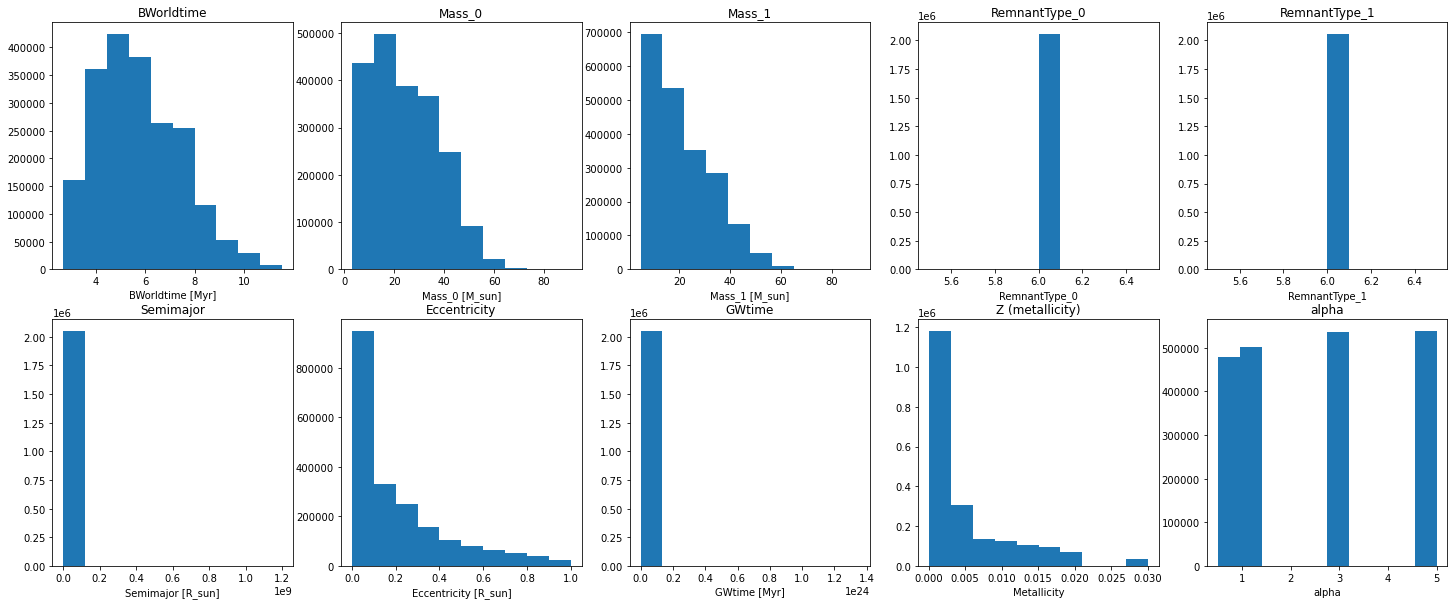

In [4]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(25, 10))

# here put the units of the x axis

ax[0,0].hist(BHBH.BWorldtime)
ax[0,0].set_title('BWorldtime')
ax[0,0].set_xlabel('BWorldtime [Myr]')

ax[0,1].hist(BHBH.Mass_0)
ax[0,1].set_title('Mass_0')
ax[0,1].set_xlabel('Mass_0 [M_sun]')

ax[0,2].hist(BHBH.Mass_1)
ax[0,2].set_title('Mass_1')
ax[0,2].set_xlabel('Mass_1 [M_sun]')

ax[0,3].hist(BHBH.RemnantType_0)
ax[0,3].set_title('RemnantType_0')
ax[0,3].set_xlabel('RemnantType_0')

ax[0,4].hist(BHBH.RemnantType_1)
ax[0,4].set_title('RemnantType_1')
ax[0,4].set_xlabel('RemnantType_1')

ax[1,0].hist(BHBH.Semimajor)
ax[1,0].set_title('Semimajor')
ax[1,0].set_xlabel('Semimajor [R_sun]')

ax[1,1].hist(BHBH.Eccentricity)
ax[1,1].set_title('Eccentricity')
ax[1,1].set_xlabel('Eccentricity [R_sun]')

ax[1,2].hist(BHBH.GWtime)
ax[1,2].set_title('GWtime')
ax[1,2].set_xlabel('GWtime [Myr]')

ax[1,3].hist(BHBH.Z)
ax[1,3].set_title('Z (metallicity)')
ax[1,3].set_xlabel('Metallicity')

ax[1,4].hist(BHBH.alpha)
ax[1,4].set_title('alpha')
ax[1,4].set_xlabel('alpha')

#### Fixed Time-Steps

In [39]:
TMIN = 0;  TMAX = 100000 # Myr
#initial_state = (a0, e0)
NSTEPS        = int(1e6)

# just for the try
M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]
a0, e0 = BHBH[['Semimajor', 'Eccentricity']].iloc[0]

# schwarzschild radius
r_sc = 6 * G * max(M1, M2) / c**2

# time step
h = ( TMAX - TMIN ) / (NSTEPS - 1.)
# time grid
t = np.linspace(TMIN, TMAX, NSTEPS)

### Euler scheme

In [40]:
a, e = (np.zeros(shape=NSTEPS) for i in range(N))

# first values from the table
a[0] = a0
e[0] = e0

start_time = time.time()
i = 0
# here instead of 0 should be r_sc
while a[i] >= r_sc:
    a[i+1], e[i+1] = ODE_EU( t[i], (a[i], e[i]), h, M2, M1 )
    i+=1

print("number of steps: %s"  % i)
print("Zeroing Time-Step: %s"  % list(x <= r_sc for x in a).index(True))
print("runtime: %s seconds" % (time.time() - start_time))

print("Time instant in which the Semimajor axis goes to 0:\t", t[a<=r_sc][0])
print("Eccentricity when Semimajor axis goes to:\t\t",         e[a<=r_sc][0])

number of steps: 999347
Zeroing Time-Step: 999347
runtime: 12.751803636550903 seconds
Time instant in which the Semimajor axis goes to 0:	 99934.79993479993
Eccentricity when Semimajor axis goes to:		 0.0004335604013024949


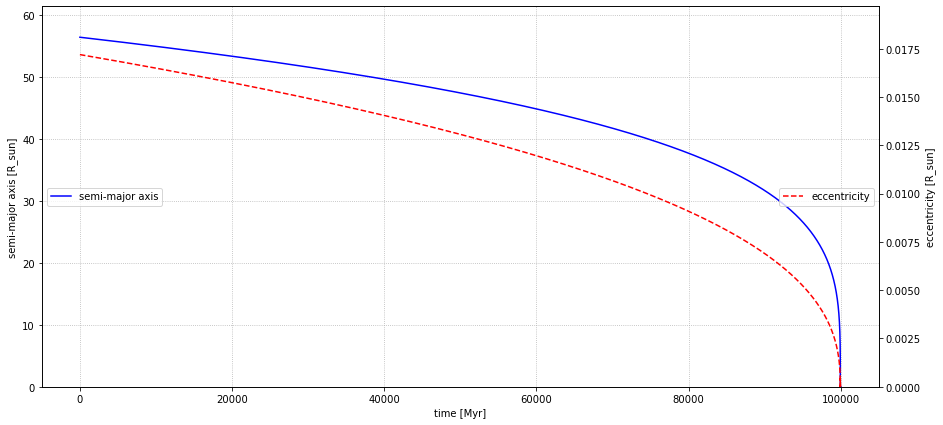

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis [R_sun]')
ax.set_xlabel('time [Myr]')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0, top=a0+5)

ax_ = ax.twinx()
ax_.plot(t,e,'r--', label='eccentricity')
ax_.set_ylabel('eccentricity [R_sun]')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0, top=e0+.0025)
plt.show()

Here the functions in Derivatives.py are used: the method uses a_eu 4th order Runge-Kutta method.

In [42]:
a, e = (np.zeros(shape=NSTEPS) for i in range(N))

# first values from the table
a[0] = a0
e[0] = e0

start_time = time.time()
i = 0
# here instead of 0 should be r_sc
while a[i] >= r_sc:
    a[i+1], e[i+1] = ODE_RK( t[i], (a[i], e[i]), h, M2, M1 )
    i+=1

print("number of steps: %s"  % NSTEPS)
print("Zeroing Time-Step: %s"  % list(x <= r_sc for x in a).index(True))
print("runtime: %s seconds" % (time.time() - start_time))

number of steps: 1000000
Zeroing Time-Step: 999341
runtime: 51.56510543823242 seconds


In [43]:
print("Time instant in which the Semimajor axis goes to 0:\t", t[a<=r_sc][0])
print("Eccentricity when Semimajor axis goes to:\t\t",         e[a<=r_sc][0])

Time instant in which the Semimajor axis goes to 0:	 99934.19993419993
Eccentricity when Semimajor axis goes to:		 -0.00013498232872293767


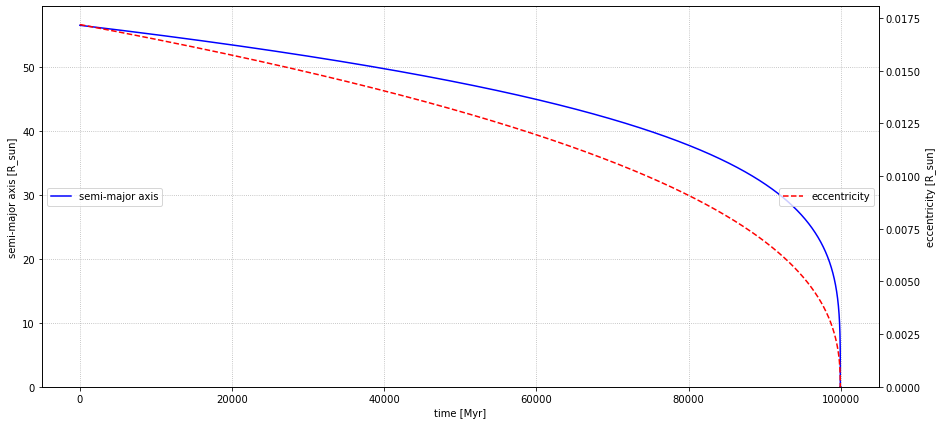

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis [R_sun]')
ax.set_xlabel('time [Myr]')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

ax_ = ax.twinx()
ax_.plot(t,e,'r--', label='eccentricity')
ax_.set_ylabel('eccentricity [R_sun]')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0)
plt.show()

In [45]:
# time grid
t = np.linspace(TMIN, TMAX, NSTEPS)
initial_state = (a0, e0)

# definining another function to swap t and y
# to fit the needs of scipy.odeint
def system_ODE(curr_state, t, M, m):
    return deriv( t, curr_state, M, m )

z = odeint(system_ODE, initial_state, t, args=(M2, M1))

# the warnings are about the steps in which a and e get negative:
# an exit condition should be done when a,e<0


print("Time instant in which the Semimajor axis goes to 0:\t", t[z[:,0]<=r_sc][0])
print("Eccentricity when Semimajor axis goes to:\t\t",    z[:,1][z[:,0]<=r_sc][0])

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9993406062716D+05   r2 =  0.1848582692399D-11
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9993406062716D+05   r2 =  0.1848582692399D-11
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9993406062716D+05   r2 =  0.1848582692399D-11
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9993406062716D+05   r2 =  0.1848582692399D-11
 lsoda--  warning..internal t (=r1) 

/home/aidin/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


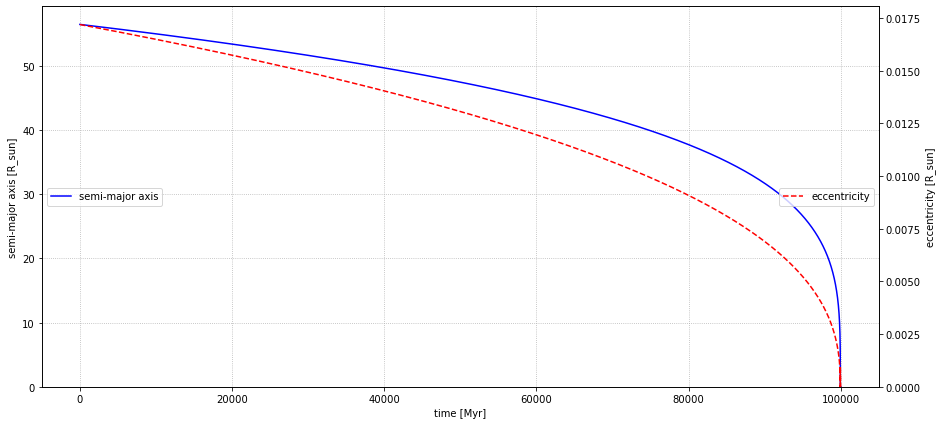

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,z[:,0],'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis [R_sun]')
ax.set_xlabel('time [Myr]')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

ax_ = ax.twinx()
ax_.plot(t,z[:,1],'r--', label='eccentricity')
ax_.set_ylabel('eccentricity [R_sun]')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

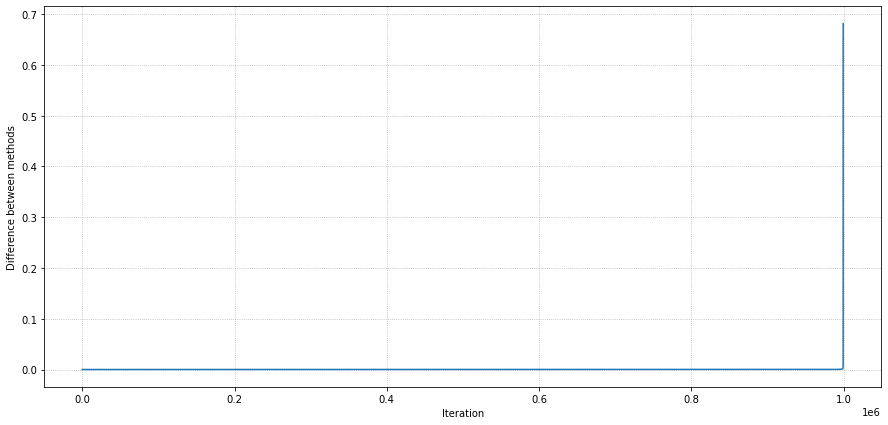

In [47]:
'''
Difference between semimajors computed with user provided script and
the scipy function odeint
'''

# index in which a gets negative
idx = list(x <= r_sc for x in a).index(True)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(a[:idx]-z[:idx,0])
ax.set_ylabel('Difference between methods')
ax.set_xlabel('Iteration')
ax.grid(ls='dotted')
plt.show

In [50]:
# Using the function ode (to allow implementing an exit condition)
# One could work on the integration methods using
# .set_integrator(name, **integrator params)

M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]
initial_state = (a0, e0)

r = ode(deriv)
r.set_initial_value(initial_state)
r.set_f_params(M1, M2)
t1 = TMIN
dt = h

while r.successful() and r.y[0] >= r_sc:
    r.integrate(r.t+dt)

print("final", r.t, "\n")

final 99930.97550159066 



/home/aidin/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


 DVODE--  Warning..internal T (=R1) and H (=R2) are
       such that in the machine, T + H = T on the next step  
       (H = step size). solver will continue anyway
      In above,  R1 =  0.9993097550159D+05   R2 =  0.5050943463391D-11
 DVODE--  Warning..internal T (=R1) and H (=R2) are
       such that in the machine, T + H = T on the next step  
       (H = step size). solver will continue anyway
      In above,  R1 =  0.9993097550159D+05   R2 =  0.5050943463391D-11
 DVODE--  Above warning has been issued I1 times.  
       it will not be issued again for this problem
      In above message,  I1 =         2


#### Adaptive Time-Steps

In [28]:
def adaptive_h(hh, a_old, a_new):
    timestep = hh
    
    if CASE==0:  
        timestep = h0* (a_new/a_old)       
    
    if CASE==1:  
        timestep = hh* (a_new/a_old)       
        
    elif CASE==2:                    
        if (np.abs(a_new-a_old)/a_old )< (0.1* tol): 
            timestep =hh*2
        elif (np.abs(a_new-a_old)/a_old) > tol:
            while (np.abs(a_new-a_old)/a_old)> tol:
                timestep=timestep/10
                a_new = ODE_RK(t[i], yin, timestep, M2, M1 )[0]
    return(timestep)

In [30]:
start_time = time.time()
NSTEPS = int(1e6)
TMIN = 0;  TMAX = 100000
a0   = 56;   e0 = .02

# just for the try
M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]


#initial time
t0 = TMIN

a, e =   (np.zeros(shape=NSTEPS) for i in range(2))
t =       np.zeros(shape=NSTEPS)
h_list =  np.zeros(shape=NSTEPS)

#----------------
CASE = 3
tol  = 2  #just in case 3
h0   = 1000   #just in case 3
#----------------

# first values from the table
a    [0] = a0
e    [0] = e0
t    [0] = TMIN
#----------------

i= 0
while a[i] > 0:
    yin    = [a[i], e[i]]
    
    if i > 0:     
          h = adaptive_h(h_list[i-1], a[i-1], a[i])        
    else: h = h0
    
    yout   = ODE_RK(t[i], yin, h, M2, M1 )
    a[i+1] = yout[0]
    t[i+1] = t[i] + h
    i+=1
    h_list[i] = h
#     print("h", h)


print("------------------------")
zero_index = list(x <= 0 for x in a).index(True)
print("Zeroing Time-Step: %s"% zero_index)
print("runtime: %s seconds"  % (time.time() - start_time))
print("h lower bound: %s"    % np.min(h_list[np.nonzero(np.abs(h_list))]))
print("h upper bound: %s"    % np.max(h_list[np.nonzero(np.abs(h_list))]))
print("------------------------")

------------------------
Zeroing Time-Step: 193
runtime: 0.3305089473724365 seconds
h lower bound: 1000.0
h upper bound: 1000.0
------------------------


In [31]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[a<=0][0])
# print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[e<=0][0])

Time instant in which the Semimajor axis goes to 0:		 97000.0


(0.0, 64.6445096916163)

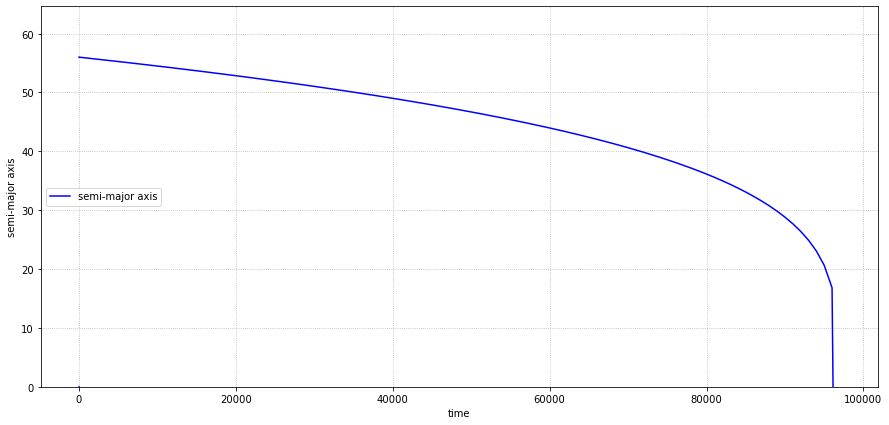

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

In [16]:
# fig, ax = plt.subplots(figsize=(15,7))
# ax.plot(t[:zero_index],h[:zero_index],'-g',markersize=1, color ='green',  label='adaptive time-step (h)')
# ax.set_ylabel('h rate')
# ax.set_xlabel('time')
# ax.legend(loc='center left')
# ax.grid(ls='dotted')
# ax.set_ylim(bottom=min(h[:zero_index]))

# axes = plt.axes( [ 0.4, 0.3, 0.3, 0.4 ] )
# axes.plot(t[:zero_index],h[:zero_index],'--g',markersize=1, color ='green', label='critical decay of adaptive time-step (h)')
# axes.set_ylabel('h rate')
# axes.set_xlabel('time')
# axes.legend(loc='best')
# axes.grid(ls='dotted')
# axes.set_xlim(12,12.6)
# axes.set_ylim(0.0001, 0.0006)

In [18]:
# print("time-step lower bound %s:"% np.min(h_list[np.nonzero(np.abs(h))]))
# print("time-step upper bound %s:"% np.max(h_list[np.nonzero(np.abs(h))]))

In [25]:
# print('Delay time tabulated:\t\t', BHBH['GWtime'].iloc[0])

Delay time tabulated:		 99749.91


### Distribution of the delay times

In [57]:
# Sequential computation of the delay time for each entry

# set tolerance, i.e. the maximum difference between
# the y values (the difference should be constant theoretically )
tol = 2
# initial time step
#h   = 3.1536e10 #1e3 yr
h = 500
t = TMIN

# function to compute the delay time for each entry
def delay_time(row, h, t):
    # assign the masses
    M1 = row.Mass_0
    M2 = row.Mass_1

    # schwarzschild radius (3 times)
    r_sc = 6 * G * max(M1, M2) / c**2

    # assign the initial values
    a = row.Semimajor
    e = row.Eccentricity

    while a > r_sc:
        a_new, e_new = ODE_RK( t, (a, e), h, M2, M1 )

        if abs( a_new - a )/a < (0.1*tol): #set adaptive timestep
            h *= 2
            a_new, e_new = ODE_RK( t, (a, e), h, M2, M1 )

        elif abs(a_new - a)/a > tol:
            while abs(a_new - a)/a > tol:
                h /= 10.
                a_new, e_new = ODE_RK( t, (a, e), h, M2, M1 )

        a, e = (a_new, e_new)
        t += h

    return pd.Series([t, e])

delay = BHBH.apply(func=delay_time, axis='columns', args=(h, t))
delay.rename(columns={0:'Delay_Time', 1:'Eccentricity'}, inplace=True)

/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/Derivatives.py:36: RuntimeWarning: invalid value encountered in double_scalars
  dydx[0] = -64/5   *     G**3*M*m*(M+m)/(c**5*a**3*(1-e**2)**(7/2)) * (1 +  73/ 24*e**2 + 37/96*e**4)
/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/Derivatives.py:37: RuntimeWarning: invalid value encountered in double_scalars
  dydx[1] = -304/15 * e * G**3*M*m*(M+m)/(c**5*a**4*(1-e**2)**(5/2)) * (1 + 121/304*e**2             )


In [59]:
#delay.to_csv(dir+'Delay_Time.csv')